# Twitter情感分析（Logistic回归）

![pexels-brett-jordan-5417837.jpg](https://images.pexels.com/photos/5417837/pexels-photo-5417837.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

# 1. 数据处理

数据可视化、文本分析、文本矢量化和模型构建。此外，还从"nltk"库中下载了英文的stopwords。

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None
import os #File location
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
# https://github.com/nltk/nltk_data
nltk.download('stopwords')
nltk.data.path.append("./nltk_data/")

./en_core_web_sm-2.3.0.zip
./test.py
./twitter_validation.csv
./twitter_Logistic.ipynb
./bi-directional-lstm.ipynb
./en_core_web_sm-2.3.0.tar.gz
./glove.6B.300d.txt.zip
./bi-directional-lstm copy.ipynb
./twitter_Logistic_back.ipynb
./omw-1.4.zip
./glove.6B.300d.txt
./twitter_training.csv
./Twitter Sentiment Analysis.zip
./other/twitter-sentiment-analysis-with-lstm.ipynb
./other/twitter-classification-using-logistic-reggression.ipynb
./other/twitter-sentiment-analysis-nlp-using-bert.ipynb
./nltk_data/corpora/omw-1.4.zip
./nltk_data/corpora/wordnet.zip
./nltk_data/corpora/wordnet/index.adv
./nltk_data/corpora/wordnet/LICENSE
./nltk_data/corpora/wordnet/adj.exc
./nltk_data/corpora/wordnet/data.adv
./nltk_data/corpora/wordnet/noun.exc
./nltk_data/corpora/wordnet/index.verb
./nltk_data/corpora/wordnet/data.noun
./nltk_data/corpora/wordnet/index.sense
./nltk_data/corpora/wordnet/data.verb
./nltk_data/corpora/wordnet/README
./nltk_data/corpora/wordnet/index.adj
./nltk_data/corpora/wordnet/cnt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mengmeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


然后，通过使用panda的"read_csv"函数将验证集和训练集保存在两个变量上，这两个变量都没有数据头。

In [2]:
#Validation dataset
val=pd.read_csv("./twitter_validation.csv", header=None)
#Full dataset for Train-Test
train=pd.read_csv("./twitter_training.csv", header=None)

对数据中列的名字进行重命名

In [3]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
val_data=val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


为了准备文本分析的数据，使用"str.lower"方法创建了一个额外的行。然而，由于有些推文只有数字值（例如推文中只有2），因此使用了一个额外的函数将所有数据转换为字符串。

然后，利用正则表达式删除一些特殊字符。

In [7]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

下表显示了这两个文本列之间的差异。

In [8]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


# 2. 特征可视化

为了识别每个标签主要使用的单词，使用word_cloud来查看训练集中哪些是最重要的单词。

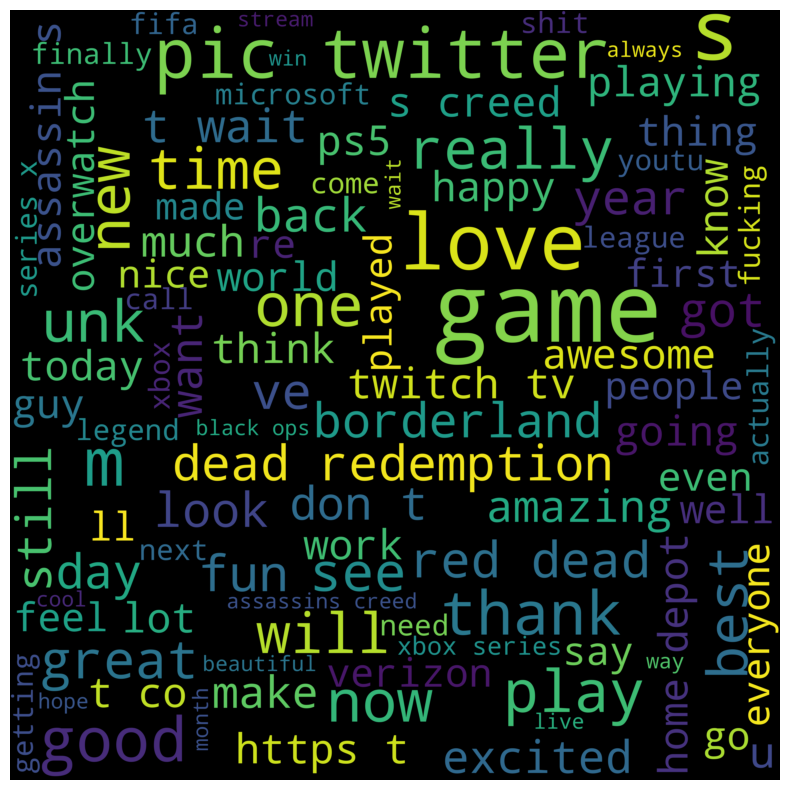

In [9]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

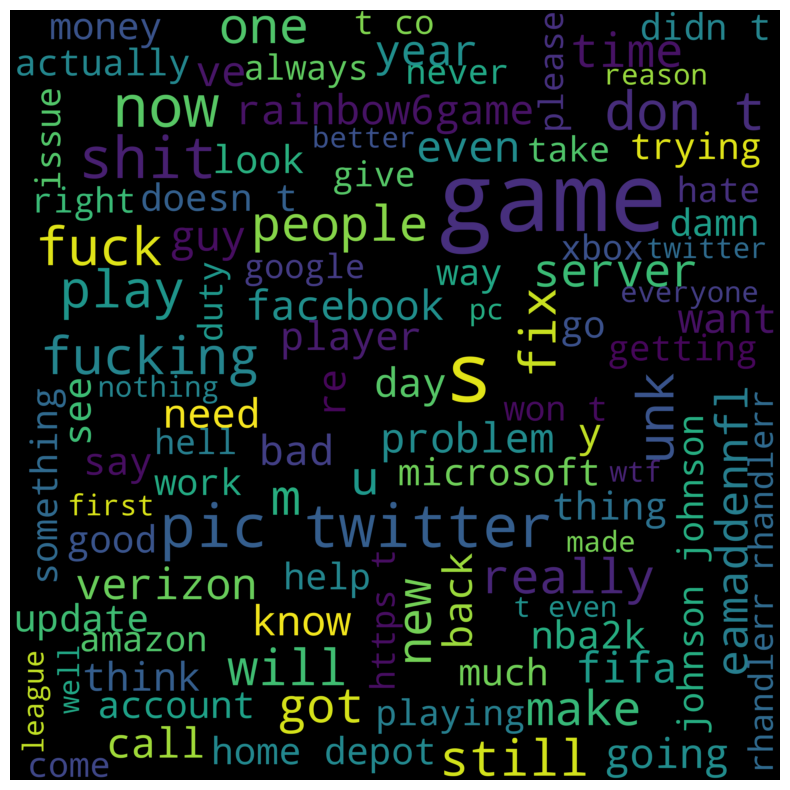

In [10]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

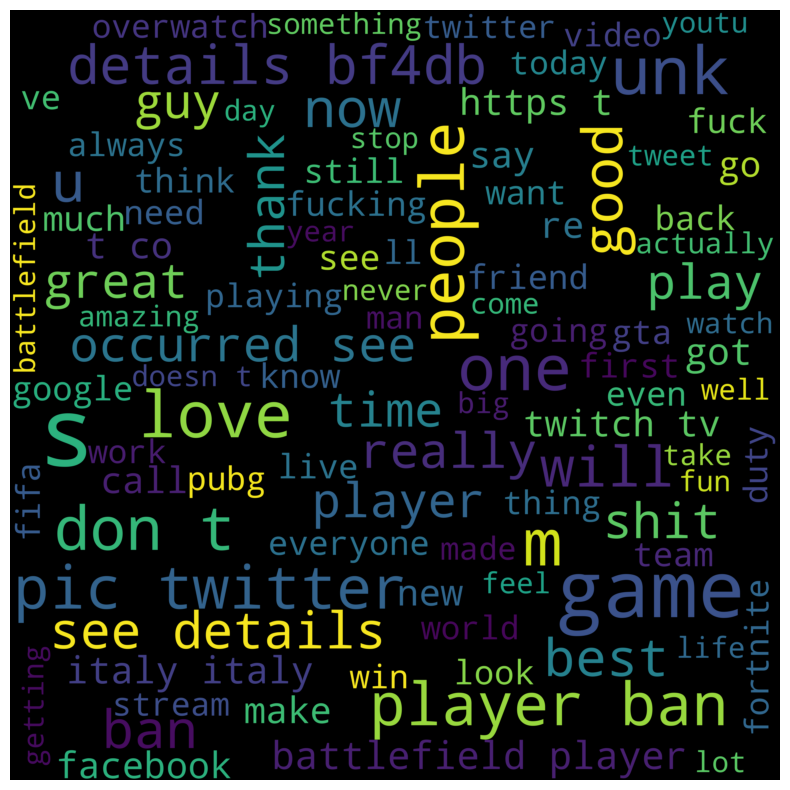

In [11]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

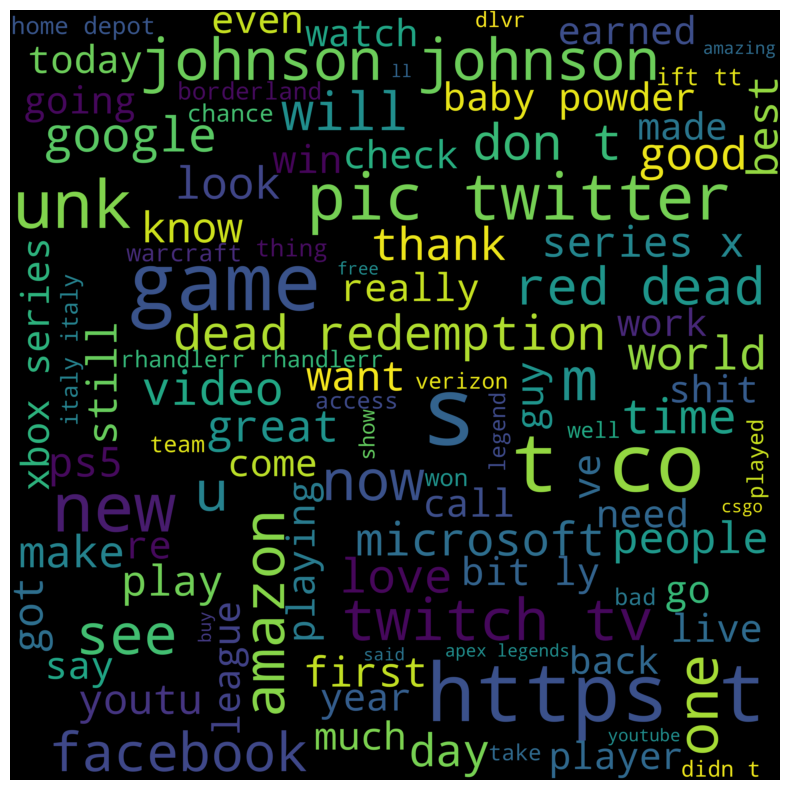

In [12]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

最后，将信息按品牌分组，以制作一个条形图，显示每条推文的数量。

In [13]:
#Count information per category
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


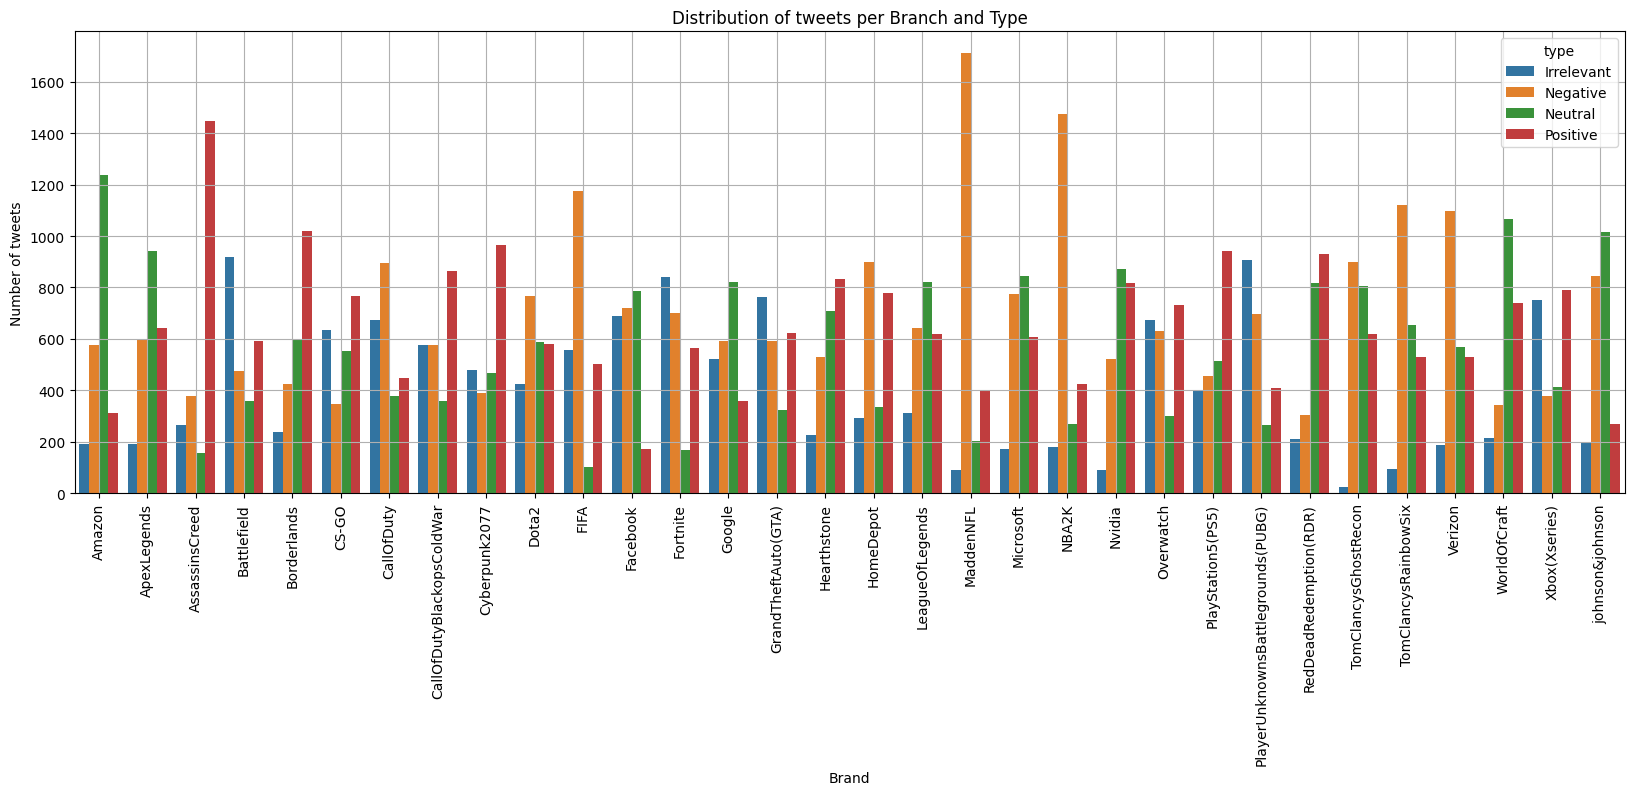

In [14]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

# 3. 文本分析

使用干净的文本，对分词（token）进行计数，以确定模型的复杂性。目前，有超过3万个不同的单词。

In [15]:
# 将每个sentence分为token的list，所有sentence的token list组成了一个更大的list。
tokens_text = pass
# Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


tokens_text变量根据列表中存储的不同单词对所有文本进行分组。

In [16]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

此外，英语的stopwords保存在一个额外的变量上，用于后续的建模。

In [17]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

# 4. Logistic回归模型
这里使用Logistic回归模型和词袋（Bag of Words, BoW）来进行分类。

对于初始的BoW, 这里使用了长度为1的[ngram](https://deepai.org/machine-learning-glossary-and-terms/n-gram)。

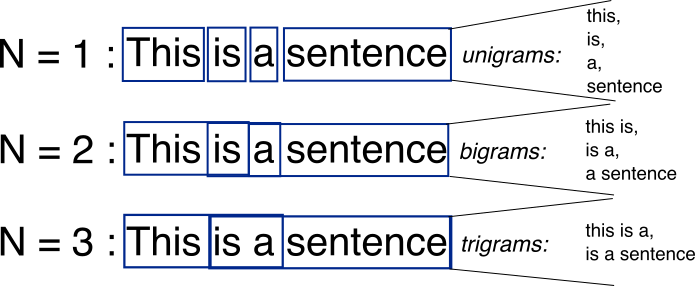

In [18]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

然后，通过使用训练数据集作为参考，将主要数据与单词编码一起拆分到训练和测试数据集上：

In [19]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [20]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/home/mengmeng/Env/teaching/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/mengmeng/Env/teaching/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [21]:
X_test_bow

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [22]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

每个类别的推文总数显示，负面和正面的推文数量最多，而不相关的推文最少。

In [23]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

利用这些数据，对Logistic回归模型进行了训练。

In [24]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.50900448550578


/home/mengmeng/Env/teaching/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [26]:
X_val_bow

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [27]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  91.7


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_val_bow, Val_res))
print("\n")
print(classification_report(y_val_bow, Val_res))

[[141  11   6  14]
 [  3 253   3   7]
 [  3  12 262   8]
 [  5   5   6 261]]


              precision    recall  f1-score   support

  Irrelevant       0.93      0.82      0.87       172
    Negative       0.90      0.95      0.93       266
     Neutral       0.95      0.92      0.93       285
    Positive       0.90      0.94      0.92       277

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



作业：使用长度为4的n-gram，并且不对stopwords单独处理。查看一下实验结果。输出：
- 验证集的正确率
- 测试集的正确率
- Confusion Matrix